<a href="https://colab.research.google.com/github/tomek-l/fire/blob/master/19_07_06_VGG_monolith_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG-16 based binary fire classifier (v2)

# Binary classifier based of VGG-16 

In [6]:
from keras.applications import VGG16
from keras import models
from keras import layers

model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in model.layers:
  layer.trainable = False

x = model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x.trainable = True
x = layers.Dense(1, activation='sigmoid')(x)
x. trainable = True

model = models.Model(model.input, x)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/gdrive/My Drive/FireVideo/binary_dataset/train',
        # All images will be resized to 150x150
        target_size=(256, 256),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        directory='/content/gdrive/My Drive/FireVideo/binary_dataset/validation',
        target_size=(256, 256),
        batch_size=16,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 1826 images belonging to 2 classes.
Found 191 images belonging to 2 classes.


W0706 15:04:24.998028 139813664946048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 15:04:25.011679 139813664946048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
 - 64s - loss: 0.5286 - acc: 0.7788 - val_loss: 0.3614 - val_acc: 0.8832
Epoch 2/30
 - 58s - loss: 0.3819 - acc: 0.8700 - val_loss: 0.2982 - val_acc: 0.8731
Epoch 3/30
 - 58s - loss: 0.3244 - acc: 0.8750 - val_loss: 0.2573 - val_acc: 0.9070
Epoch 4/30
 - 58s - loss: 0.3037 - acc: 0.8787 - val_loss: 0.2300 - val_acc: 0.9158
Epoch 5/30
 - 58s - loss: 0.2648 - acc: 0.9056 - val_loss: 0.2265 - val_acc: 0.9133
Epoch 6/30
 - 58s - loss: 0.2533 - acc: 0.9087 - val_loss: 0.2060 - val_acc: 0.9182
Epoch 7/30
 - 59s - loss: 0.2579 - acc: 0.9019 - val_loss: 0.2115 - val_acc: 0.9309
Epoch 8/30
 - 60s - loss: 0.2468 - acc: 0.9038 - val_loss: 0.2054 - val_acc: 0.9234
Epoch 9/30
 - 60s - loss: 0.2284 - acc: 0.9169 - val_loss: 0.2076 - val_acc: 0.9108
Epoch 10/30
 - 59s - loss: 0.2368 - acc: 0.9225 - val_loss: 0.2070 - val_acc: 0.9234
Epoch 11/30
 - 59s - loss: 0.2186 - acc: 0.9225 - val_loss: 0.2056 - val_acc: 0.9271
Epoch 12/30
 - 60s - loss: 0.2204 - acc: 0.9206 - val_loss: 0.1923 - val_a

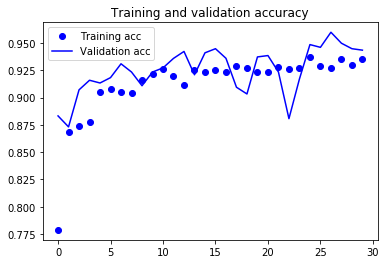

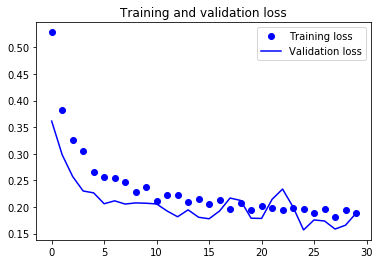

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.save('/content/gdrive/My Drive/FireVideo/VGG_monolth_30epochs.h5')